# Divvy Cycles
#### Author: Mark Richards
#### Date: 2022-12-01

## Introduction
This is a case study based open source data provided by Lyft Bikes and Scooters LLC who operate the city of Chicago's Divvy bike sharing service, which allows people to hire bicycles from any of 600+ bike stations across Chicago for short-duration trips. 

Further information on the Divvy bike service data can be found at https://ride.divvybikes.com/system-data.
The data itself is available at https://divvy-tripdata.s3.amazonaws.com/index.html and has been provided for use under the following agreement https://ride.divvybikes.com/data-license-agreement. 

## Defining the Business Task
Divvy has two types of customers: __annual members__ who pay a fixed fee and can use the cycle hire scheme as frequently as they want for one year; and __casual users__, who pay on a per-trip basis. Annual members are more profitable for the company than casual users and the intention is to develop a marketing campaign to increase annual membership. The business task we are given is to explore and identify the ways in which annual members and casual members differ in their use of the cycle hire scheme, so that this could in future be a basis for the marketing campaign.  

## The Data
The data we have available consists of historical trip data. Each trip has a unique __trip id__, a __start datetime__ and __end datetime__, a __start station id__ and __end station id__, __start coordinates__ and __end coordinates__ (as separate latitude and longitude), and whether the trip was made by a __casual user__ or an __annual member__.

We have data for the 12 month period April 2020 to March 2021. This is stored in CSV format in monthly segments, so 12 separate files.

Lets load the data and combine it into a single tibble.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
setwd("./CSV")

col_spec <- list(
    ride_id = col_character(),
    rideable_type = col_character(),
    started_at = col_datetime(format = ""),
    ended_at = col_datetime(format = ""),
    start_station_name = col_character(),
    start_station_id = col_character(),
    end_station_name = col_character(),
    end_station_id = col_character(),
    start_lat = col_double(),
    start_lng = col_double(),
    end_lat = col_double(),
    end_lng = col_double(),
    member_casual = col_character()
)

tbl_202004_divvy_tripdata <- read_csv(
    "202004-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202006_divvy_tripdata <- read_csv(
    "202006-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202008_divvy_tripdata <- read_csv(
    "202008-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202010_divvy_tripdata <- read_csv(
    "202010-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202012_divvy_tripdata <- read_csv(
    "202012-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202102_divvy_tripdata <- read_csv(
    "202102-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202005_divvy_tripdata <- read_csv(
    "202005-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202007_divvy_tripdata <- read_csv(
    "202007-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202009_divvy_tripdata <- read_csv(
    "202009-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202011_divvy_tripdata <- read_csv(
    "202011-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202101_divvy_tripdata <- read_csv(
    "202101-divvy-tripdata.csv",
    col_types = col_spec
)

tbl_202103_divvy_tripdata <- read_csv(
    "202103-divvy-tripdata.csv",
    col_types = col_spec
)

ride_data <- bind_rows(
    tbl_202004_divvy_tripdata,
    tbl_202006_divvy_tripdata,
    tbl_202008_divvy_tripdata,
    tbl_202010_divvy_tripdata,
    tbl_202012_divvy_tripdata,
    tbl_202102_divvy_tripdata,
    tbl_202005_divvy_tripdata,
    tbl_202007_divvy_tripdata,
    tbl_202009_divvy_tripdata,
    tbl_202011_divvy_tripdata,
    tbl_202101_divvy_tripdata,
    tbl_202103_divvy_tripdata
)

rm(
    tbl_202004_divvy_tripdata,
    tbl_202006_divvy_tripdata,
    tbl_202008_divvy_tripdata,
    tbl_202010_divvy_tripdata,
    tbl_202012_divvy_tripdata,
    tbl_202102_divvy_tripdata,
    tbl_202005_divvy_tripdata,
    tbl_202007_divvy_tripdata,
    tbl_202009_divvy_tripdata,
    tbl_202011_divvy_tripdata,
    tbl_202101_divvy_tripdata,
    tbl_202103_divvy_tripdata
)

Lets have a look at the data.

In [3]:
head(ride_data, n=10)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member
A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635,41.8923,-87.6120,41.8957,-87.6201,member
FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382,41.8665,-87.6847,41.8747,-87.6864,casual
9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359,41.8949,-87.6323,41.9035,-87.6434,casual


In [4]:
glimpse(ride_data)

Rows: 3,489,748
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ ended_at           <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat          <dbl> 41.8964, 41.9244, 41.8945, 41.9030, 41.8902, 41.896…
$ start_lng          <dbl> -87.6610, -87.7154, -87.6179, -87.6975, -87.6262, -…
$ end_lat            <dbl> 41.9322, 41.9306, 41.8679, 41.8992, 41.9695, 41.892…
$ end_lng            <dbl> -87.6586, -87.7238, -87.6230, -87.6722, -87.6547, -…
$ member_cas

## Cleaning The Data

Lets examine each variable in turn.

* __ride_id__: Each ride_id should be unique as each represents a unique trip. 

In [5]:
sum(duplicated(ride_data$ride_id))

[1] 209

In [6]:
sum(is.na(ride_data$ride_id))

[1] 0

But when we check there are 209 duplications, although no missing data. 

The number of duplications is tiny in comparison with the total number of rows, so lets remove the duplicate rows.

In [7]:
ride_data_clean <- ride_data %>%
    filter(
        !duplicated(ride_data$ride_id)
    )

* __rideable_type__: 

In [8]:
unique(ride_data_clean$rideable_type)

[1] "docked_bike"   "electric_bike" "classic_bike"

In [9]:
sum(is.na(ride_data_clean$rideable_type))

[1] 0

This column only contains three values with no missing data.

* __started_at__: This is a datetime.

In [10]:
sum(is.na(ride_data_clean$started_at))

[1] 0

 There are no missing values.

* __ended_at__: Another datetime.  

In [11]:
sum(is.na(ride_data_clean$ended_at))

[1] 0

But we also need to check the consistency of the time data: the ride end time should be after the start time, for example.

In [12]:
sum(
    (ride_data_clean$ended_at - ride_data_clean$started_at) == 0
)

[1] 386

In [13]:
sum(
    (ride_data_clean$ended_at - ride_data_clean$started_at) < 0
)

[1] 10550

In fact though there are 386 trips with zero duration and 10550 with negative duration. These again are only a relatively small proportion of the total number of observations, so lets remove them.

In [14]:
ride_data_clean <- ride_data_clean %>%
    filter(
        (ride_data_clean$ended_at - ride_data_clean$started_at) > 0
    )

  As we have a start datetime and an end datetime, we can also look at consistency in terms of trip duration. Lets add trip duration as a column.

In [15]:
ride_data_clean <- ride_data_clean %>%
    mutate(
        trip_duration_min = as.numeric(
            (ended_at - started_at) / 60
        )
    )

In [16]:
nrow(
    ride_data_clean %>%
    filter(
        trip_duration_min > 720
    )
)

[1] 6343

  There are some outlier trip durations which are greater than 12 hours. I am going to make the decision to consider these anomalies, given the relatively small number of them. Lets remove them.

In [17]:
ride_data_clean <- ride_data_clean %>%
    filter(
        !(trip_duration_min > 720)
    )

* __start_station_name__: 

In [18]:
sum(is.na(ride_data_clean$start_station_name))

[1] 122126

There are 122175 observations without values. Lets pin this point for the moment and come back to it.

* __start_station_id__:  

In [19]:
sum(is.na(ride_data_clean$start_station_id))

[1] 122752

There are 122801 missing values. Lets pin this point as well.

* __end_station_name__:  

In [20]:
sum(is.na(ride_data_clean$end_station_name))

[1] 142033

There are 142214 missing values.

* __end_station_id__: 

In [21]:
sum(is.na(ride_data_clean$end_station_id))

[1] 142494

There are 142675 missing values.

* __start_lat__: 

In [22]:
sum(is.na(ride_data_clean$start_lat))

[1] 0

There are no missing values.

* __start_lng__: 

In [23]:
sum(is.na(ride_data_clean$start_lng))

[1] 0

There are no missing values.

* __end_lat__: 

In [24]:
sum(is.na(ride_data_clean$end_lat))

[1] 3715

There are 3776 missing values.

* __end_lng__: 

In [25]:
sum(is.na(ride_data_clean$end_lng))

[1] 3715

There are 3776 missing values.

* __member_casual__: 

In [26]:
sum(is.na(ride_data_clean$member_casual))

[1] 0

In [27]:
unique(ride_data_clean$member_casual)

[1] "member" "casual"

There are no missing values and only the two expected values.

So the two outstanding issues are:

* __Station Names__: we have data with missing station names and station ids.
* __Trip End Coordinates__: we have data missing the trip end latitude and longitude.

We could try to create a look-up table for the stations using the observations with complete data and then insert missing values using that; and we could try to do something similar for the missing coordinates. But this would be quite complicated.

Or we could just exclude all the observations with missing data. If we do this we would still be keeping most of the data and we will still have a huge number of observations. So lets proceed that way.

In [28]:
ride_data_clean <- ride_data_clean %>%
    filter(
        !(
            is.na(ride_data_clean$start_station_name) |
            is.na(ride_data_clean$end_station_name) |
            is.na(ride_data_clean$start_station_id) |
            is.na(ride_data_clean$end_station_id) |
            is.na(ride_data_clean$end_lat) |
            is.na(ride_data_clean$end_lng)
        )
    )

## Exploration

We could explore the differences in usage between members and casual users in several ways:

* The number of trips each group takes.
* Trip duration.
* Trip start time.
* Distribution of trips across the data period.
* Distance travelled between start and end station.
* Riding speed.
* Geographical clustering of start/end stations.

Lets examine each in turn.

### Number of Trips

In [29]:
num_of_trips <- ride_data_clean %>%
    select(
        ride_id, 
        member_casual
    ) %>%
    group_by(member_casual) %>%
    summarise(trip_count = n()) %>%
    mutate(
        trip_perc = trip_count / sum(trip_count)
    ) %>%
    ungroup()

num_of_trips

member_casual,trip_count,trip_perc
<chr>,<int>,<dbl>
casual,1343098,0.4096777
member,1935328,0.5903223


The number of trips for each user type indicates that members take 59% of the total trips, 18% more than casual users.

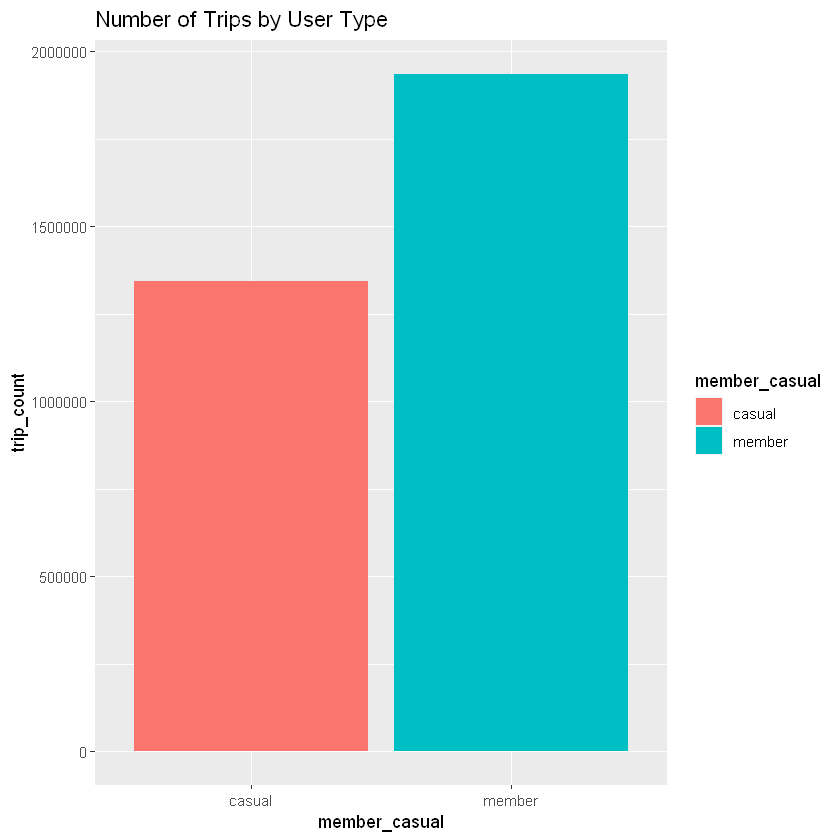

In [30]:
ggplot(
    num_of_trips,
    aes(
        x = member_casual,
        y = trip_count, 
        fill = member_casual)
) +
    geom_bar(stat = "identity") +
    ggtitle("Number of Trips by User Type")

### Trip Duration
Now lets see which group of users spend the most time riding.

In [31]:
riding_time_by_usertype_min <- ride_data_clean %>%
    select(
        ride_id,
        member_casual,
        trip_duration_min
    )  %>%
    group_by(member_casual) %>%
    summarise(
        mean_trip_time_minutes = mean(trip_duration_min),
        median_trip_time_minutes = median(trip_duration_min)
    ) %>%
    ungroup()

riding_time_by_usertype_min

member_casual,mean_trip_time_minutes,median_trip_time_minutes
<chr>,<dbl>,<dbl>
casual,34.85772,21.55000
member,15.33231,11.58333


* Members on average ride for 11.45 minutes with a median of 11.55.
* Casual users ride for an average of 33.58 minutes with a median of 21.5.

So there is a clear difference in trip duration between the user groups, with members taking shorter trips than casual users.

And we can look at the distribution of trip durations (I've limited trip duration to 200 in the graphs below, as the number of trips longer than this is small).

Warning message:
"Removed 13310 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_path()`)."


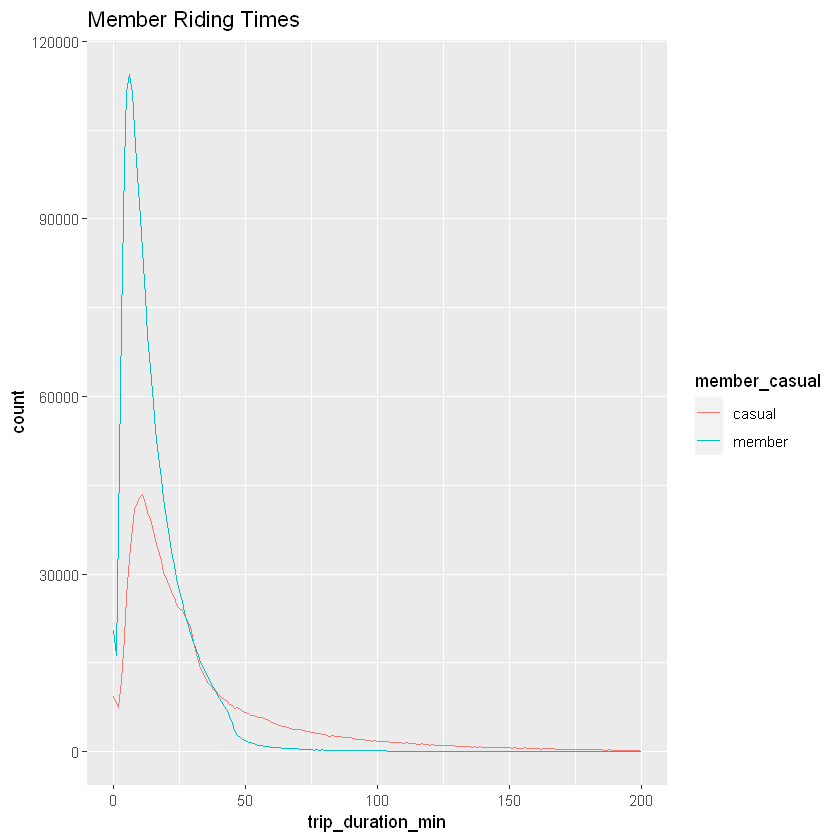

In [32]:
ride_data_clean %>%
    select(
        ride_id, 
        member_casual,
        trip_duration_min
    ) %>%
ggplot(
    aes(
        trip_duration_min, 
        color = member_casual
    )
) +
    geom_freqpoly(binwidth = 1) + 
    xlim(0, 200) + 
    ggtitle("Member Riding Times")

### Trip Start Times
We can look at what times the two groups start trips. 

In [33]:
popular_start_times <- ride_data_clean %>%
    select(
        member_casual, 
        started_at
    ) %>%
    mutate(
        start_hour = 
            format(
                as.POSIXct(started_at), 
                format = "%H"
            )
    ) %>%
    group_by(
        member_casual,
        start_hour
    ) %>%
    summarise(
        num_of_trips = n()
    ) %>%
    ungroup()

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


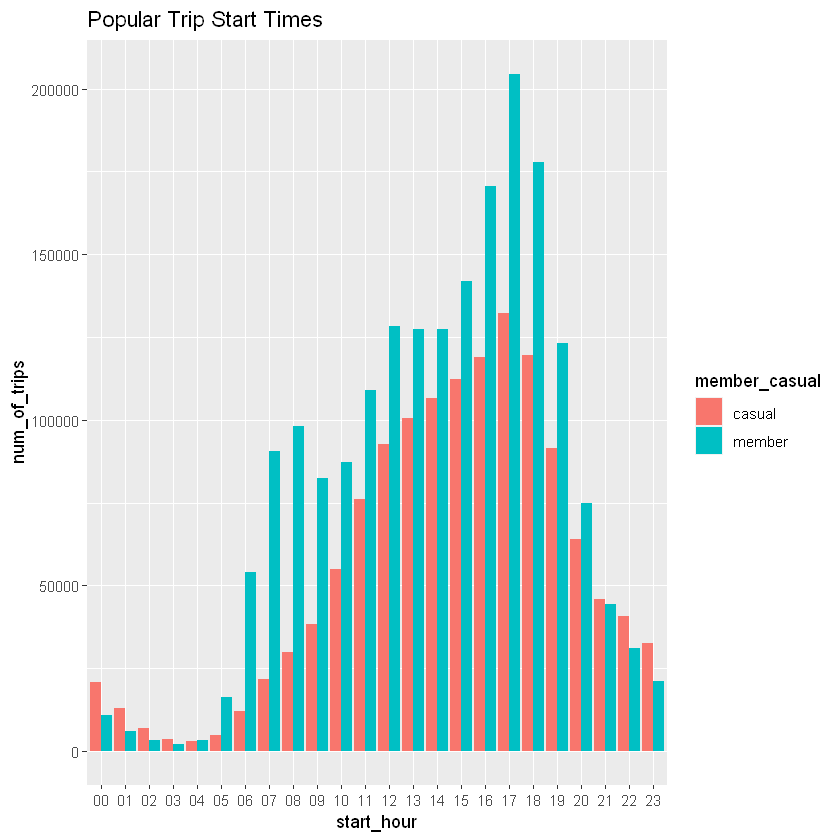

In [34]:
ggplot(
    popular_start_times,
    aes(
        start_hour,
        num_of_trips,
        fill = member_casual
    )
) +
    geom_bar(
        stat = "identity", 
        position = position_dodge()
    ) +
    ggtitle("Popular Trip Start Times")

There is a difference between the two groups: member usage has peaks aligning with rush hour commuting hours and lunchtime.

### Distribution of trips across the data period.
We can look at the number of trips across the 12 month data period to see if there is any difference between members and casual users. 

In [35]:
trips_per_day <- ride_data_clean %>%
    select(
        ride_id,
        started_at,
        member_casual
    ) %>%
    mutate(
        ride_date = as.Date(started_at)
    ) %>%
    group_by(
        member_casual,
        ride_date
    ) %>%
    summarise(
        num_of_trips = n()
    ) %>%
    ungroup()

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


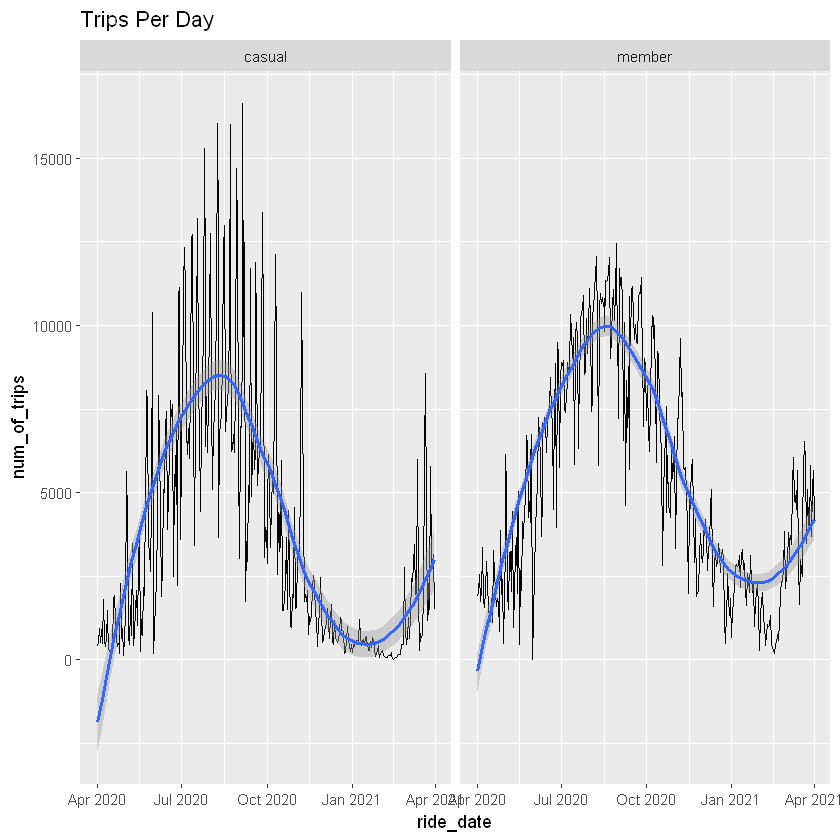

In [36]:
ggplot(
    trips_per_day,
    aes(
        ride_date,
        num_of_trips)
) +
    facet_wrap(~ member_casual) +
    geom_line(stat = "identity") +
    geom_smooth() +
    ggtitle("Trips Per Day")

We can see that there is a seasonal pattern common to both members and casual users, but members are more consistent in their use of the service, whilst casual users shows considerable short-term variation, especially in the summer months, but also around other specific periods.

### Distance Between Start and End Stations
We can _approximate_ the linear distance between start and end stations as difference of latitude and longitude using the Pythagorean theorem - this is not strictly true on the surface of a sphere but as the distances we are considering are very short in comparison to the size of the Earth the surface can be considered as locally flat. 

If we multiply the result by 111139 we get the straight line distance in metres and dividing that by 1000 gives us the distance in kilometres. So we can just multiply by 111.139 to directly get the distance in kilometres. 

Lets add this to the data as a column. We need to remember that this is the distance between start and end stations, not the actual distance the users travelled.

In [37]:
ride_data_clean <- ride_data_clean %>%
    mutate(
        straight_line_distance_km =
            (sqrt(
                (start_lat - end_lat)^2 +
                (start_lng - end_lng)^2
                ) 
                * 111.139
            )
    )

Now lets look at the differences in straight line distance between the two user types.

In [38]:
distance_by_usertype <- ride_data_clean %>%
    group_by(member_casual) %>%
    summarise(
        mean_trip_distance_km = mean(straight_line_distance_km),
        median_trip_distance_km = median(straight_line_distance_km)
    ) %>%
    ungroup()

distance_by_usertype

member_casual,mean_trip_distance_km,median_trip_distance_km
<chr>,<dbl>,<dbl>
casual,2.407748,1.882123
member,2.534344,1.977223


There only seems to be a small difference between members and casual users.

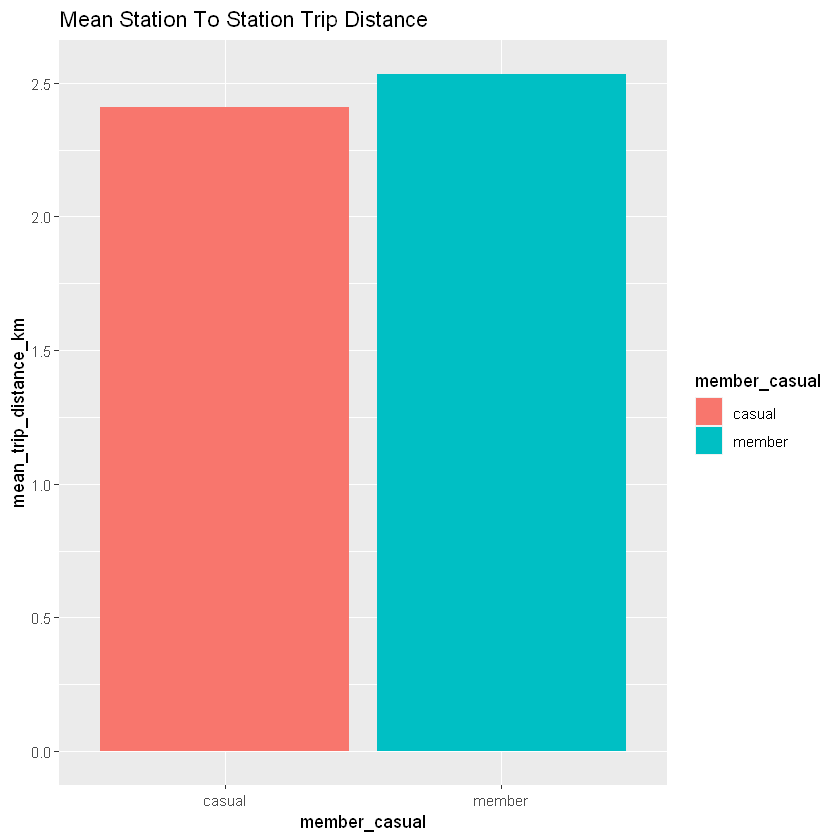

In [39]:
ggplot(
    distance_by_usertype,
    aes(
        x = member_casual, 
        y = mean_trip_distance_km, 
        fill = member_casual
    )
) +
    geom_bar(stat = "identity") +
    ggtitle("Mean Station To Station Trip Distance")

Lets look at the distribution.

In [40]:
trips_by_distance <- ride_data_clean %>%
    select(
        ride_id, 
        member_casual, 
        straight_line_distance_km)

Warning message:
"Removed 2806 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_path()`)."


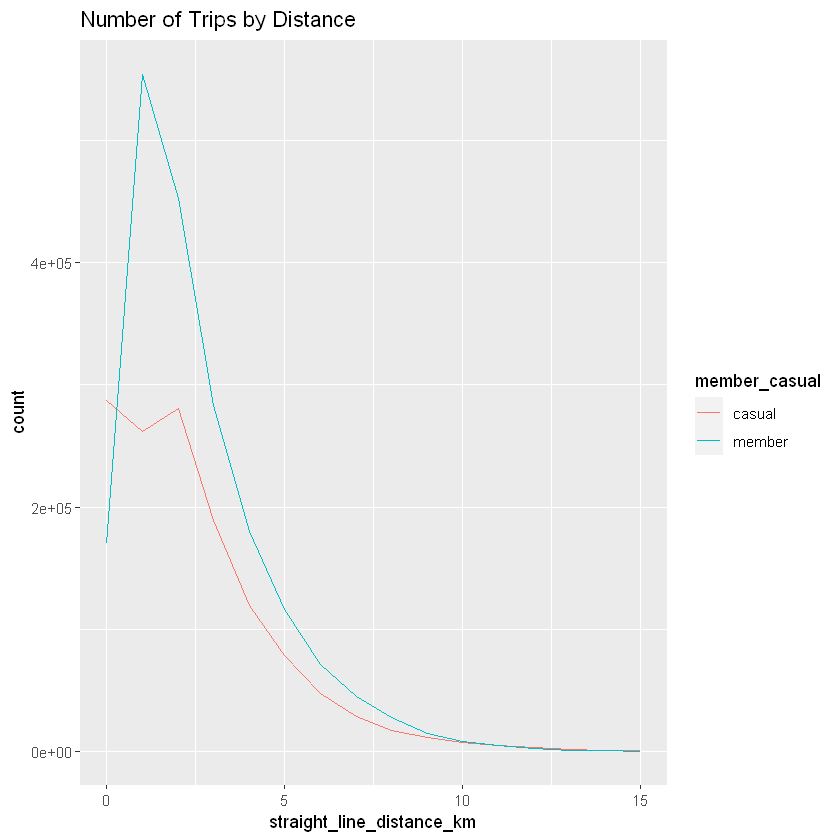

In [41]:
ggplot(
    trips_by_distance, 
    aes(
        x = straight_line_distance_km, 
        color = member_casual)
) +
    geom_freqpoly(binwidth = 1) +
    xlim(0, 15) + 
    ggtitle("Number of Trips by Distance")

There are some differences in the distribution of trips. 

### Riding Speed
Lets also work out how fast each rider would have to be travelling in km/h to cover the distance between start and end stations in the riding time, if they were travelling point-to-point. 

Lets add that as a variable.

In [42]:
ride_data_clean <- ride_data_clean %>%
    mutate(
        speed_kmh = (
            straight_line_distance_km
            / (as.numeric(trip_duration_min) 
            / 60)
        )
    )

The very best cyclists might be able to ride at a maximum of 40km/h in perfect conditions. So lets count how many observations exceed 40km/h.

In [43]:
nrow(
    ride_data_clean %>%
    filter(
        speed_kmh > 40
    )
)

[1] 1604

The number of anomalies is small, but lets remove them from the data.

In [44]:
ride_data_clean <- ride_data_clean %>%
    filter(
        !(speed_kmh > 40)
    )

And we can compare the average speeds of the two user groups.

In [45]:
speed_kmh_by_usertype <- ride_data_clean %>%
    group_by(member_casual) %>%
    summarise(
        mean_speed_kmh = mean(speed_kmh),
        median_speed_kmh = median(speed_kmh)
    ) %>%
    ungroup()

speed_kmh_by_usertype

member_casual,mean_speed_kmh,median_speed_kmh
<chr>,<dbl>,<dbl>
casual,7.471261,7.934018
member,11.360207,11.792513


Members seem to cycle much faster than casual users. 

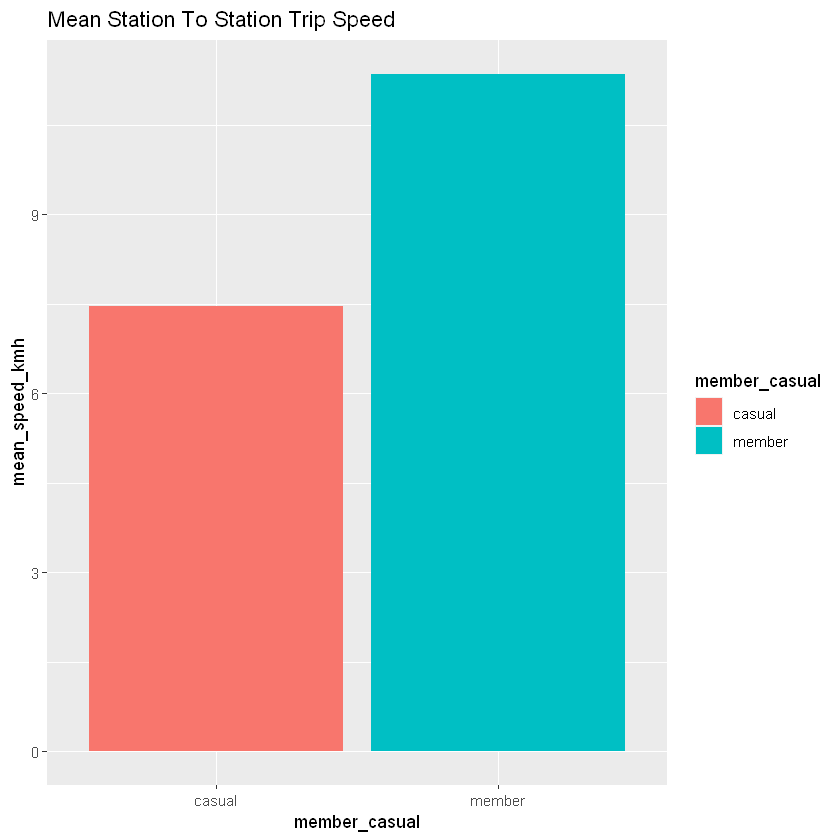

In [46]:
ggplot(
    speed_kmh_by_usertype,
    aes(
        x = member_casual, 
        y = mean_speed_kmh, 
        fill = member_casual
    )
) +
    geom_bar(stat = "identity") +
    ggtitle("Mean Station To Station Trip Speed")

In [47]:
speed_trips_by_usertype <- ride_data_clean %>%
    select(
        ride_id, 
        speed_kmh,
        member_casual
    )

Warning message:
"Removed 4 rows containing missing values (`geom_path()`)."


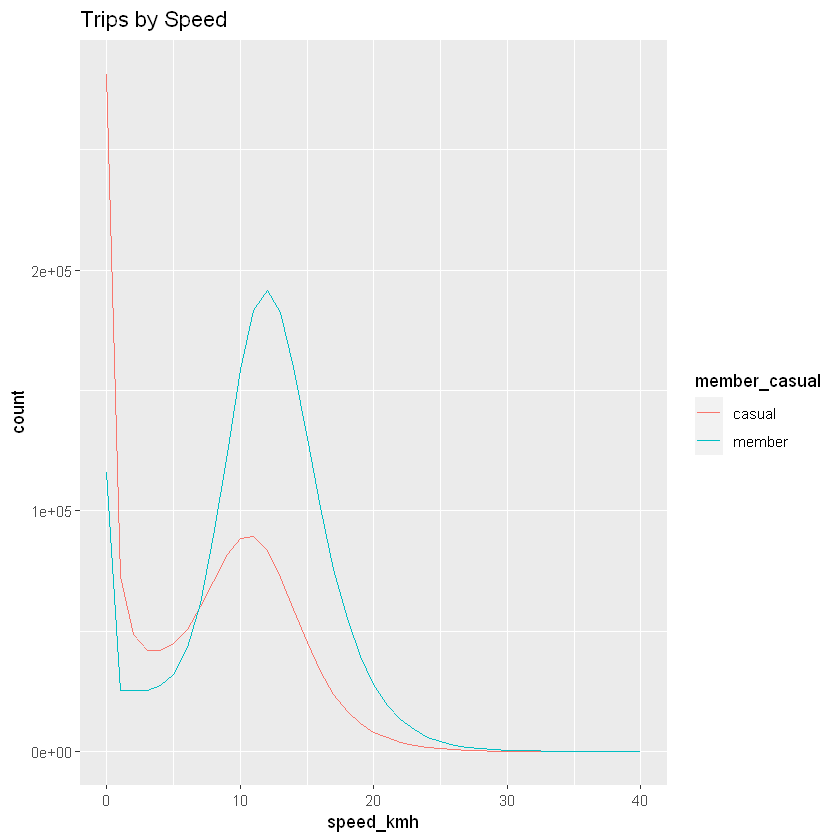

In [48]:
ggplot(
    speed_trips_by_usertype, 
    aes(
        x = speed_kmh, 
        color = member_casual
    )
) +
    geom_freqpoly(binwidth = 1) + 
    xlim(0, 40) + 
    ggtitle("Trips by Speed")

### Geographical Clustering
We can look at the coordinates members and casual users start their journeys at. In future, we could plot these coordinates on a map of Chicago to see exactly which districts and neibourhoods each group preferred, but for now we will just examine whether there is in fact a geographical preference difference between members and casual users.

We have far too many observations to plot all of them, so we will plot a random sample of 100,000 of each user type.

In [49]:
geographical_sample_members <- ride_data_clean %>%
    filter(
        member_casual == "member" &
        start_lat > 41.8 &
        start_lat < 42.1 &
        start_lng < 87.75
    ) %>%
    select(
        ride_id, 
        member_casual,
        start_lat,
        start_lng
    ) %>%
    sample_n(100000)

geographical_sample_casual <- ride_data_clean %>%
    filter(
        member_casual == "casual"  &
        start_lat > 41.8 &
        start_lat < 42.1 &
        start_lng < 87.70
    ) %>%
    select(
        ride_id, 
        member_casual, 
        start_lat, 
        start_lng
    ) %>%
    sample_n(100000)

geographical_sample_all <-
    rbind(
        geographical_sample_members,
        geographical_sample_casual
    )

Warning message:
"Removed 6358 rows containing non-finite values (`stat_density2d_filled()`)."


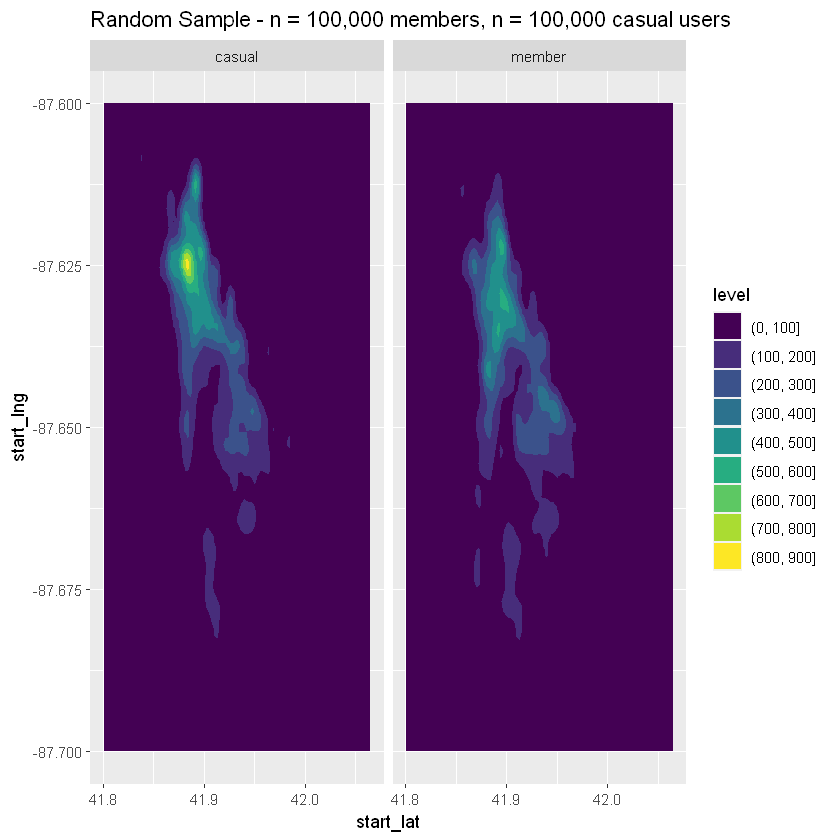

In [50]:
ggplot(
    geographical_sample_all, 
    aes(
        start_lat, 
        start_lng
    )
) +
    facet_wrap(~ member_casual) +
    geom_density_2d_filled() +
    ylim(-87.70, -87.60) +
    ggtitle("Random Sample - n = 100,000 members, n = 100,000 casual users")

We can see that there is a clear difference between the two groups: casual use peaks in a small area; member use is more geographically spread out. 

## Conclusions

We have found several clear indicators of differences between cycle hire usage of casual users and members. Further investigation along these lines could provide input to a marketing campaign. There are of course other differences we could also examine. 